##### Concurrency and interaction  2024/2025
### Lecture 4 - Grover's algorithm

1. [Grover's Algorithm](#Grover) <p>
   a.  [Unstructured search](#unstructured-search) <p>
   b.  [Oracle](#oracle_intro) <p>
   c.  [Amplitude Amplification](#amplitude_amp) <p>
2. [Grover's algorithm with 2 qubits](#grover2)
3. [Grover's algorithm with 3 qubits](#grover3)
4. [Amplitude Amplification and multiple winner states](#multiple)
5. [Removing the ancilla](#ancilla)

## 1. Grover's algorithm <a id="grover"></a>

Grover's algorithm is one of the most powerful quantum algorithms. The algorithm is known for a quadratic speed up in searching for an element in an **unstructured database**. 

Grover's algorithm can be used in any problem that can be restated as an unstructured search problem:

* Finding minimum/maximum/mean 
* Collision problem 
* Satisfiability 
* Optimization in general. 

### a. Unstructured Search <a id="unstructured-search"></a>

Suppose you have an array of $N$ items. Consider that $w$ for winner is the element we want to find. 

![image1](images/list.png)

Classic $\quad \Rightarrow \quad \mathcal{O}(N)$

Quantum $\quad \Rightarrow \quad \mathcal{O}(\sqrt{N})$

### b. Oracle

Notice that we want to exploit the superposition principle, therefore, all entries in the above database will happen at the same time! Thus, for us, the database is composed by all computational basis states our qubits can be in.

The oracle $U_w$ adds a negative phase to the solution states i.e. for any state $|x\rangle$ in the computational basis corresponding to the winner:

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}
$$

we can use an ancilla to store the result of the function! 


Similar to Deutsch-Jozsa, we initialize the 'output' qubit in the state $|{-}\rangle$, and the phase kickback effect do the rest.
</p><p>  

![image1](images/function.png)


Now, the goal is to find a routine that amplifies the probability of measuring the winner state! 

### c. Amplitude Amplification <a id="amplitude_amp"></a>

The Diffusion operator $D$ is a reflection about the mean of the amplitudes. It is defined as:

$$D = 2|DB \rangle \langle DB| - I$$

where |DB\rangle is the database superposition quantum state. D amplifies the amplitude of the winner state.

Full Grover's circuit is:
![image5](images/full_circuit.png)

## 2. Grover's algorithm with 2 qubits <a id="grover2"></a>

Let's suppose we want to find the state $|11\rangle$.
Build the Grover's algorithm and check the probabilities 

In [25]:
import pennylane as qml
from pennylane import numpy as np

n_qubits = 3

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def grover(n_qubits, id):


    #create registers
    db = [0, 1]
    ancilla = [2]

    #superposition
    for i in range(n_qubits):
        if i in ancilla:
            qml.X(wires=i)
            qml.Hadamard(wires=i)
        else:
            qml.Hadamard(wires=i)
            

    
    #oracle
    qml.Toffoli(wires=[db[0], db[1], ancilla[0]])
    

    #or using the MultiControlledX gate with control state
    #qml.MultiControlledX(control_wires=input_registers, wires=ancilla_register, control_values=id)

    for i in db:
        qml.Hadamard(wires=i)
        qml.PauliX(wires=i)

    qml.CZ(wires=[db[0], db[1]])
        
    for i in db:
        qml.Hadamard(wires=i)
        qml.PauliX(wires=i)
        

    #diffusion
    # use  qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1]) for a general implementation


    #measurement
    return qml.probs(wires=db)
    


(<Figure size 1100x400 with 1 Axes>, <Axes: >)

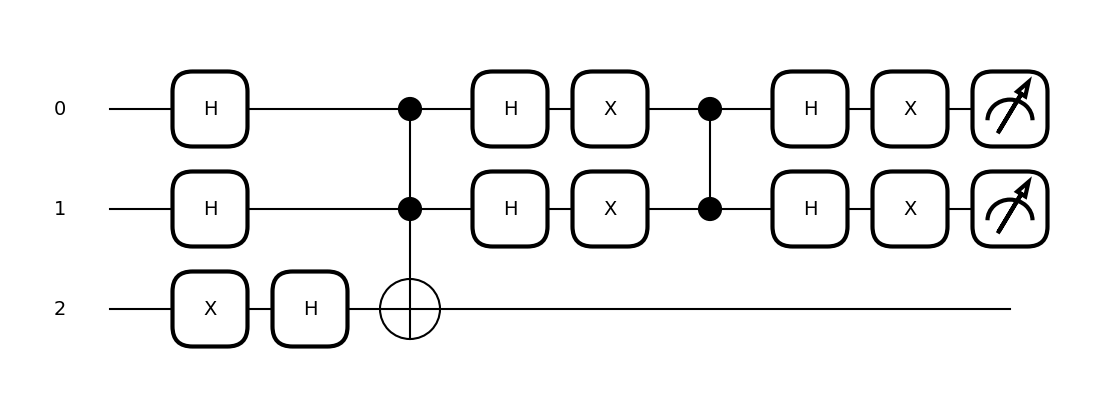

In [26]:
#visualize the circuit
qml.draw_mpl(grover)(n_qubits=3, id=0)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (4,).

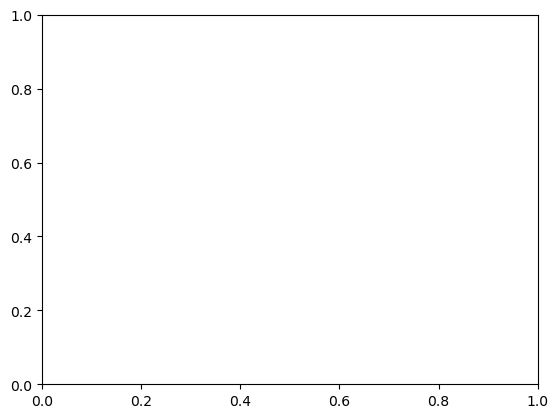

In [ ]:
#Run the algorithm

probs = grover(n_qubits=2, id=0)


#Visualize the probability histogram
import matplotlib.pyplot as plt
# plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)
plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")


## 3. Grover's algorithm with 3 qubits <a id="grover3"></a>  


Let's suppose we want to find the state $|011\rangle$. Run Grover's algorithm and check the probabilities.

In [ ]:
#Run the algorithm and visualize the probability histogram

## 4. Amplitude Amplification and multiple winner states <a id="multiple"></a>

1) Let's suppose we want to find one of the states $\{|000\rangle , |001\rangle \}$. 
2) Let's suppose we want to find one of the states $\{|0000\rangle , |0010\rangle , |0100\rangle , |1000\rangle \}$.

What do 1) and 2) have in common?

## 5. Removing the ancilla <a id="ancilla"></a>

Rewrite the Grover's algorithm without the ancilla qubit - find one of the states $\{|0000\rangle , |0010\rangle , |0100\rangle , |1000\rangle \}$.